In [1]:
import os
import pickle as pkl
import sys
import numpy as np
import pandas as pd

In [16]:
from scipy.interpolate import InterpolatedUnivariateSpline
# print ("bokeh version", bokeh.__version__)
#, HBox, VBoxForm, BoxSelectTool, TapTool
#from bokeh.models.widgets import Select
#Slider, Select, TextInput
# from bokeh.plotting import output_file
# import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
try:
    os.environ['SESNPATH']
    os.environ['SESNCFAlib']

except KeyError:
    print ("must set environmental variable SESNPATH and SESNCfAlib")
    sys.exit()

cmd_folder = os.getenv("SESNCFAlib")
if cmd_folder not in sys.path:
    sys.path.insert(0, cmd_folder)
cmd_folder = os.getenv("SESNCFAlib") + "/templates"
if cmd_folder not in sys.path:
    sys.path.insert(0, cmd_folder)

# from savgol import savitzky_golay
from snclasses import *
import snclasses as snstuff
from templutils import *
# from makePhottable import *
# from colors import rgb_to_hex
# from ubertemplates import *
# from matplotlib.ticker import AutoMinorLocator, MultipleLocator, MaxNLocator

%matplotlib inline

In [17]:
su = setupvars()

In [3]:
allsne = pd.read_csv(os.getenv("SESNCFAlib") +
                          "/SESNessentials.csv", encoding = "ISO-8859-1")['SNname'].values

In [18]:
su.bands

['U', 'u', 'B', 'V', 'R', 'I', 'g', 'r', 'i', 'J', 'H', 'K', 'w1', 'w2', 'm2']

In [45]:
# snr = pd.DataFrame({'snr': [], 'band': []})
# snr['sn'] = {}
temp = []

snrs = []
bands = []

dmags = []

lc_ = {}
# bands = su.bands

for i, sn in enumerate(allsne):
    
#     snr['sn'].append(sn)
    
    # read and set up SN and look for photometry files
    try:
        thissn = snstuff.mysn(sn, addlit=True)
    except AttributeError:
        print('removed sn: ', sn)
        continue
    if len(thissn.optfiles) + len(thissn.fnir) == 0:
        print ("bad sn")
    # read metadata for SN
    thissn.readinfofileall(verbose=False, earliest=False, loose=True)
    #thissn.printsn()
#     if not thissn.type == SNTYPE:
#        continue
#     if thissn.snnameshort in avoid:
#         continue
    # check SN is ok and load data
    if thissn.Vmax is None or thissn.Vmax == 0 or np.isnan(thissn.Vmax):
        print ("bad sn: No Vmax")
  

    lc, flux, dflux, snname = thissn.loadsn2(verbose=True)
    
    
    
    
#     lc['dmag'][lc['dmag']==0] = 0.1*np.ones(len(lc['dmag'][lc['dmag']==0]))
    
    lc_mag = lc['ccmag'][lc['dmag'] >= 0.01]
    lc_photcode = lc['photcode'][lc['dmag'] >= 0.01]
    lc_dmag = lc['dmag'][lc['dmag'] >= 0.01]
    
    
    
    flux = 10 ** (-lc_mag / 2.5) * 5e10
    dflux = flux * lc_dmag / LN10x2p5
    dmags.append(flux)
    
    
#     if len(lc['photcode']) != len(flux/dflux):
#         temp.append(sn)
    snr_ratio = flux/dflux
        
    
    photcode = [lc_photcode[i].decode().split('l')[0] for i in range(len(lc_photcode))]
    
    if len(np.setdiff1d(np.unique(photcode), su.bands, assume_unique=False)) != 0:
        
        dd = (np.setdiff1d(np.unique(photcode), su.bands, assume_unique=False))
        for d in dd:
        
            snr_ratio = np.asarray(snr_ratio)[np.asarray(photcode) != str(d[0])]
            photcode = np.asarray(photcode)[np.asarray(photcode) != str(d[0])]
        
    

    
    thissn.setphot()
    thissn.getphot()
    thissn.setphase()
    thissn.sortlc()
    
    
        
    snrs = np.concatenate((snrs, snr_ratio), axis = 0)
    bands = np.concatenate((bands, photcode), axis = 0)
    
    

SN name short: ASASSN-14ms



#######Optical & UV#######

No CfA optical files
all optical files: ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.snASASSN-14ms.f']


#######NIR#######

No CfA NIR files
reading small file
SNname {0: 'ASASSN-14ms'}
Type {0: 'Ib'}
source {0: 'lit'}
E(B-V) SF2011 {0: '0.0491'}
finalmaxVjd {0: '2457023.99'}
finalmaxVjderr {0: 0.84}
CfA VJD bootstrap {0: '2457023.99'}
CfA VJD bootstrap error {0: '0.84'}
CfA BJD bootstrap {0: nan}
CfA BJD error {0: nan}
CfA RJD bootstrap {0: nan}
CfA RJD error {0: nan}
CfA IJD bootstrap {0: nan}
CfA IJD error {0: nan}
D11Vmaxdate {0: nan}
D11Vmaxdateerr {0: nan}
MaxVdate {0: nan}
MaxVJD {0: nan}
Vmax_CfAmethod {0: nan}
Vmax_CfAmethod_err {0: nan}
MaxVMag {0: '16.36'}
MaxVmagerr {0: 0.05}
luminosity distance Mpc {0: nan}
comment {0: nan}
Vmax 2457023.99
here ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/liter

i
J
H
K
w1
w2
m2
SN name short: OGLE-2012-sn-006



#######Optical & UV#######

No CfA optical files
all optical files: ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.snOGLE-2012-SN-006.f']


#######NIR#######

No CfA NIR files
reading small file
SNname {7: 'OGLE-2012-sn-006'}
Type {7: 'Ibn'}
source {7: 'lit'}
E(B-V) SF2011 {7: '0.0675'}
finalmaxVjd {7: nan}
finalmaxVjderr {7: nan}
CfA VJD bootstrap {7: nan}
CfA VJD bootstrap error {7: nan}
CfA BJD bootstrap {7: nan}
CfA BJD error {7: nan}
CfA RJD bootstrap {7: nan}
CfA RJD error {7: nan}
CfA IJD bootstrap {7: '2456218.98'}
CfA IJD error {7: '0.08'}
D11Vmaxdate {7: nan}
D11Vmaxdateerr {7: nan}
MaxVdate {7: nan}
MaxVJD {7: nan}
Vmax_CfAmethod {7: nan}
Vmax_CfAmethod_err {7: nan}
MaxVMag {7: nan}
MaxVmagerr {7: nan}
luminosity distance Mpc {7: nan}
comment {7: nan}
Vmax 2456215.88
here ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templat

SNname {15: 'OGLE15vk'}
Type {15: 'Ic'}
source {15: 'lit'}
E(B-V) SF2011 {15: '0.0615'}
finalmaxVjd {15: nan}
finalmaxVjderr {15: nan}
CfA VJD bootstrap {15: nan}
CfA VJD bootstrap error {15: nan}
CfA BJD bootstrap {15: nan}
CfA BJD error {15: nan}
CfA RJD bootstrap {15: nan}
CfA RJD error {15: nan}
CfA IJD bootstrap {15: '2457360.46'}
CfA IJD error {15: '0.87'}
D11Vmaxdate {15: nan}
D11Vmaxdateerr {15: nan}
MaxVdate {15: nan}
MaxVJD {15: nan}
Vmax_CfAmethod {15: nan}
Vmax_CfAmethod_err {15: nan}
MaxVMag {15: nan}
MaxVmagerr {15: nan}
luminosity distance Mpc {15: nan}
comment {15: nan}
Vmax 2457357.36
here ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.snOGLE15vk.f']
['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.snOGLE15vk.f']
lightcurve type CfA4  /Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/lit

I
g
r
i
J
H
K
w1
w2
m2
SN name short: PTF12hni



#######Optical & UV#######

No CfA optical files
all optical files: ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.snPTF12hni.f']


#######NIR#######

No CfA NIR files
reading small file
SNname {23: 'PTF12hni'}
Type {23: 'Ic'}
source {23: 'lit'}
E(B-V) SF2011 {23: '0.0514'}
finalmaxVjd {23: nan}
finalmaxVjderr {23: nan}
CfA VJD bootstrap {23: nan}
CfA VJD bootstrap error {23: nan}
CfA BJD bootstrap {23: '2456178.68'}
CfA BJD error {23: '1.37'}
CfA RJD bootstrap {23: '2456161.84'}
CfA RJD error {23: '1.24'}
CfA IJD bootstrap {23: nan}
CfA IJD error {23: nan}
D11Vmaxdate {23: nan}
D11Vmaxdateerr {23: nan}
MaxVdate {23: nan}
MaxVJD {23: nan}
Vmax_CfAmethod {23: nan}
Vmax_CfAmethod_err {23: nan}
MaxVMag {23: nan}
MaxVmagerr {23: nan}
luminosity distance Mpc {23: nan}
comment {23: nan}
Vmax 2456170.66
here ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Res




##############  THIS SUPERNOVA IS: ###############

name:  sn1954A
type:  Ib
Vmax date: 2434850.350
Vmax  mag: 0.00
filters:  {'U': 0, 'u': 0, 'B': 0, 'V': 0, 'R': 0, 'I': 0, 'g': 0, 'r': 0, 'i': 0, 'J': 0, 'H': 0, 'K': 0, 'w1': 0, 'w2': 0, 'm2': 0}
##############  photometry by band: ###############

##################################################



['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/nirphot/54A.dat']
doing nir ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/nirphot/54A.dat']
/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/nirphot/54A.dat
0
U
u
B
V
R
I
g
r
i
J
H
K
w1
w2
m2
SN name short: 62L



#######Optical & UV#######

No CfA optical files
all optical files: ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sn62L.




##############  THIS SUPERNOVA IS: ###############

name:  sn1993J
type:  IIb
Vmax date: 2449095.230
Vmax  mag: 0.00
filters:  {'U': 0, 'u': 0, 'B': 0, 'V': 0, 'R': 0, 'I': 0, 'g': 0, 'r': 0, 'i': 0, 'J': 0, 'H': 0, 'K': 0, 'w1': 0, 'w2': 0, 'm2': 0}
##############  photometry by band: ###############

##################################################



['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/nirphot/93J.dat']
doing nir ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/nirphot/93J.dat']
/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/nirphot/93J.dat
0
U
u
B
V
R
I
g
r
i
J
H
K
w1
w2
m2
SN name short: 94I



#######Optical & UV#######

No CfA optical files
all optical files: ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sn94I


name:  sn1999dn
type:  Ib
Vmax date: 2451419.060
Vmax  mag: 0.00
filters:  {'U': 0, 'u': 0, 'B': 0, 'V': 0, 'R': 0, 'I': 0, 'g': 0, 'r': 0, 'i': 0, 'J': 0, 'H': 0, 'K': 0, 'w1': 0, 'w2': 0, 'm2': 0}
##############  photometry by band: ###############

##################################################



U
u
B
V
R
I
g
r
i
J
H
K
w1
w2
m2
SN name short: 99ex



#######Optical & UV#######

No CfA optical files
all optical files: ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sn99ex.f']


#######NIR#######

No CfA NIR files
reading small file
SNname {44: 'sn1999ex'}
Type {44: 'Ib'}
source {44: 'lit'}
E(B-V) SF2011 {44: '0.0172'}
finalmaxVjd {44: '2451501.33'}
finalmaxVjderr {44: 0.07}
CfA VJD bootstrap {44: '2451501.33'}
CfA VJD bootstrap error {44: '0.09'}
CfA BJD bootstrap {44: '<0000000'}
CfA BJD error {44: '<0000000'}
CfA RJD bootstrap {44: '<0000000'}
CfA RJD error {44: '<0000000'}
CfA IJD bootstrap {44: '<000000

all optical files: ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sn03dh.f']


#######NIR#######

No CfA NIR files
reading small file
SNname {49: 'sn2003dh'}
Type {49: 'Ic-bl'}
source {49: 'lit'}
E(B-V) SF2011 {49: '0.0214'}
finalmaxVjd {49: '2452740.63'}
finalmaxVjderr {49: 1.77}
CfA VJD bootstrap {49: '2452740.63'}
CfA VJD bootstrap error {49: nan}
CfA BJD bootstrap {49: '<0000000'}
CfA BJD error {49: '<0000000'}
CfA RJD bootstrap {49: '<0000000'}
CfA RJD error {49: '<0000000'}
CfA IJD bootstrap {49: '<0000000'}
CfA IJD error {49: '<0000000'}
D11Vmaxdate {49: nan}
D11Vmaxdateerr {49: nan}
MaxVdate {49: '2452740.58'}
MaxVJD {49: nan}
Vmax_CfAmethod {49: '-'}
Vmax_CfAmethod_err {49: '-'}
MaxVMag {49: '<17.52'}
MaxVmagerr {49: nan}
luminosity distance Mpc {49: 892.0}
comment {49: nan}
Vmax 2452740.63
here ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/ph

SNname {59: 'sn2004ge'}
Type {59: 'Ic'}
source {59: nan}
E(B-V) SF2011 {59: '0.0754'}
finalmaxVjd {59: '2453335.57'}
finalmaxVjderr {59: 1.63}
CfA VJD bootstrap {59: '2453335.57'}
CfA VJD bootstrap error {59: '1.63'}
CfA BJD bootstrap {59: '<0000000'}
CfA BJD error {59: '<0000000'}
CfA RJD bootstrap {59: '<0000000'}
CfA RJD error {59: '<0000000'}
CfA IJD bootstrap {59: '<0000000'}
CfA IJD error {59: '<0000000'}
D11Vmaxdate {59: nan}
D11Vmaxdateerr {59: nan}
MaxVdate {59: '2004'}
MaxVJD {59: '2453341.5'}
Vmax_CfAmethod {59: nan}
Vmax_CfAmethod_err {59: nan}
MaxVMag {59: '17.09'}
MaxVmagerr {59: nan}
luminosity distance Mpc {59: 67.18626259}
comment {59: nan}
Vmax 2453335.57
here ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sn04ge.f']
['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sn04ge.f']
lightcurve type CfA4  /Users/somayeh/Library/Mobile D

J
H
K
w1
w2
m2
SN name short: 05by



#######Optical & UV#######

No CfA optical files
all optical files: ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sn05by.f']


#######NIR#######

No CfA NIR files
reading small file
SNname {66: 'sn2005by'}
Type {66: 'IIb'}
source {66: 'lit'}
E(B-V) SF2011 {66: '0.018'}
finalmaxVjd {66: '2453504.05'}
finalmaxVjderr {66: 2.36}
CfA VJD bootstrap {66: '2453504.05'}
CfA VJD bootstrap error {66: '2.36'}
CfA BJD bootstrap {66: '2453503.62'}
CfA BJD error {66: '1.48'}
CfA RJD bootstrap {66: '2453506.11'}
CfA RJD error {66: '2.05'}
CfA IJD bootstrap {66: '2453504.68'}
CfA IJD error {66: '2.35'}
D11Vmaxdate {66: nan}
D11Vmaxdateerr {66: nan}
MaxVdate {66: nan}
MaxVJD {66: nan}
Vmax_CfAmethod {66: nan}
Vmax_CfAmethod_err {66: nan}
MaxVMag {66: '18.12'}
MaxVmagerr {66: 0.08}
luminosity distance Mpc {66: nan}
comment {66: nan}
Vmax 2453504.05
here ['/Users/somayeh/Library/Mobile Documents/

all optical files: ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sn05kz.f']


#######NIR#######

No CfA NIR files
reading small file
SNname {75: 'sn2005kz'}
Type {75: 'Ic'}
source {75: nan}
E(B-V) SF2011 {75: '0.046'}
finalmaxVjd {75: '2453712.94'}
finalmaxVjderr {75: 0.36}
CfA VJD bootstrap {75: '2453712.94'}
CfA VJD bootstrap error {75: '0.36'}
CfA BJD bootstrap {75: '53710.58'}
CfA BJD error {75: '0.76'}
CfA RJD bootstrap {75: '<0000000'}
CfA RJD error {75: '<0000000'}
CfA IJD bootstrap {75: '<0000000'}
CfA IJD error {75: '<0000000'}
D11Vmaxdate {75: nan}
D11Vmaxdateerr {75: nan}
MaxVdate {75: '<00000000'}
MaxVJD {75: '<2453710.562'}
Vmax_CfAmethod {75: nan}
Vmax_CfAmethod_err {75: nan}
MaxVMag {75: '<18.64'}
MaxVmagerr {75: nan}
luminosity distance Mpc {75: 83.3}
comment {75: nan}
Vmax 2453712.94
here ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/

all optical files: ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sn06ep.f']


#######NIR#######

No CfA NIR files
reading small file
SNname {82: 'sn2006ep'}
Type {82: 'Ib'}
source {82: nan}
E(B-V) SF2011 {82: '0.031'}
finalmaxVjd {82: '2453988.58'}
finalmaxVjderr {82: 0.1}
CfA VJD bootstrap {82: '2453988.58'}
CfA VJD bootstrap error {82: '0.1'}
CfA BJD bootstrap {82: '53984.96'}
CfA BJD error {82: '0.23'}
CfA RJD bootstrap {82: '53990.1'}
CfA RJD error {82: '0.11'}
CfA IJD bootstrap {82: '<0000000'}
CfA IJD error {82: '<0000000'}
D11Vmaxdate {82: nan}
D11Vmaxdateerr {82: nan}
MaxVdate {82: '20060909.95'}
MaxVJD {82: '2453988'}
Vmax_CfAmethod {82: nan}
Vmax_CfAmethod_err {82: nan}
MaxVMag {82: '17.4'}
MaxVmagerr {82: nan}
luminosity distance Mpc {82: 65.15222795}
comment {82: nan}
Vmax 2453988.58
here ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/

reading small file
SNname {87: 'sn2006lc'}
Type {87: 'Ib'}
source {87: nan}
E(B-V) SF2011 {87: '0.0556'}
finalmaxVjd {87: '2454041.35'}
finalmaxVjderr {87: 2.0}
CfA VJD bootstrap {87: nan}
CfA VJD bootstrap error {87: '--'}
CfA BJD bootstrap {87: '<0000000'}
CfA BJD error {87: '<0000000'}
CfA RJD bootstrap {87: '<0000000'}
CfA RJD error {87: '<0000000'}
CfA IJD bootstrap {87: '<0000000'}
CfA IJD error {87: '<0000000'}
D11Vmaxdate {87: nan}
D11Vmaxdateerr {87: nan}
MaxVdate {87: '<20061104.1'}
MaxVJD {87: '<2454045.6'}
Vmax_CfAmethod {87: nan}
Vmax_CfAmethod_err {87: nan}
MaxVMag {87: '<17.5'}
MaxVmagerr {87: nan}
luminosity distance Mpc {87: 70.38920578}
comment {87: nan}
Vmax 2454041.35
here ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sn06lc.f']
['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sn06lc.f']
lightcurve type CfA4  /Users/somayeh/L

SNname {95: 'sn2007C'}
Type {95: 'Ib'}
source {95: nan}
E(B-V) SF2011 {95: '0.0363'}
finalmaxVjd {95: '2454116.95'}
finalmaxVjderr {95: 0.51}
CfA VJD bootstrap {95: '2454116.95'}
CfA VJD bootstrap error {95: '0.51'}
CfA BJD bootstrap {95: '<0000000'}
CfA BJD error {95: '<0000000'}
CfA RJD bootstrap {95: '54117.8'}
CfA RJD error {95: '0.15'}
CfA IJD bootstrap {95: '<0000000'}
CfA IJD error {95: '<0000000'}
D11Vmaxdate {95: nan}
D11Vmaxdateerr {95: nan}
MaxVdate {95: '20070116.6'}
MaxVJD {95: '2454116.8'}
Vmax_CfAmethod {95: nan}
Vmax_CfAmethod_err {95: nan}
MaxVMag {95: '16.14'}
MaxVmagerr {95: nan}
luminosity distance Mpc {95: 25.40314744}
comment {95: nan}
Vmax 2454116.95
here ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sn07C.f']
['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sn07C.f']
lightcurve type CfA4  /Users/somayeh/Library/Mobile Doc

U
u
B
V
R
I
g
r
i
J
H
K
w1
w2
m2
SN name short: 07ke



#######Optical & UV#######

No CfA optical files
all optical files: ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sn07ke.f']


#######NIR#######

No CfA NIR files
reading small file
SNname {101: 'sn2007ke'}
Type {101: 'Ib-Ca-rich'}
source {101: nan}
E(B-V) SF2011 {101: '0.0954'}
finalmaxVjd {101: nan}
finalmaxVjderr {101: nan}
CfA VJD bootstrap {101: '<0000000'}
CfA VJD bootstrap error {101: '--'}
CfA BJD bootstrap {101: '<0000000'}
CfA BJD error {101: '<0000000'}
CfA RJD bootstrap {101: '2454369.12'}
CfA RJD error {101: '1.39'}
CfA IJD bootstrap {101: '<0000000'}
CfA IJD error {101: '<0000000'}
D11Vmaxdate {101: nan}
D11Vmaxdateerr {101: nan}
MaxVdate {101: '--'}
MaxVJD {101: '<00000000'}
Vmax_CfAmethod {101: nan}
Vmax_CfAmethod_err {101: nan}
MaxVMag {101: '--'}
MaxVmagerr {101: nan}
luminosity distance Mpc {101: 77.6}
comment {101: nan}
Vmax 2454367.62
her

SNname {108: 'sn2007rz'}
Type {108: 'Ic'}
source {108: nan}
E(B-V) SF2011 {108: '0.1723'}
finalmaxVjd {108: nan}
finalmaxVjderr {108: nan}
CfA VJD bootstrap {108: '<2454454.79'}
CfA VJD bootstrap error {108: '--'}
CfA BJD bootstrap {108: '54455.49'}
CfA BJD error {108: '1.61'}
CfA RJD bootstrap {108: '54455.74'}
CfA RJD error {108: '1.94'}
CfA IJD bootstrap {108: '<0000000'}
CfA IJD error {108: '<0000000'}
D11Vmaxdate {108: nan}
D11Vmaxdateerr {108: nan}
MaxVdate {108: '<<200'}
MaxVJD {108: '<2454454.8'}
Vmax_CfAmethod {108: nan}
Vmax_CfAmethod_err {108: nan}
MaxVMag {108: '<18.5'}
MaxVmagerr {108: nan}
luminosity distance Mpc {108: 56.27424304}
comment {108: nan}
Vmax 2454456.515
here ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sn07rz.f']
['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sn07rz.f']
lightcurve type CfA4  /Users/somayeh/Library/

U
u
B
V
R
I
g
r
i
J
H
K
w1
w2
m2
SN name short: 08bo



#######Optical & UV#######

No CfA optical files
all optical files: ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sn08bo.f']


#######NIR#######

No CfA NIR files
reading small file
SNname {113: 'sn2008bo'}
Type {113: 'IIb'}
source {113: nan}
E(B-V) SF2011 {113: '0.0513'}
finalmaxVjd {113: '2454569.74'}
finalmaxVjderr {113: 0.16}
CfA VJD bootstrap {113: '2454569.74'}
CfA VJD bootstrap error {113: '0.16'}
CfA BJD bootstrap {113: '54567.8'}
CfA BJD error {113: '0.23'}
CfA RJD bootstrap {113: '54570.33'}
CfA RJD error {113: '0.59'}
CfA IJD bootstrap {113: '<0000000'}
CfA IJD error {113: '<0000000'}
D11Vmaxdate {113: nan}
D11Vmaxdateerr {113: nan}
MaxVdate {113: '20080415.5'}
MaxVJD {113: '2454569.7'}
Vmax_CfAmethod {113: nan}
Vmax_CfAmethod_err {113: nan}
MaxVMag {113: '16.12'}
MaxVmagerr {113: nan}
luminosity distance Mpc {113: 21.32591389}
comment {113: nan}
V

U
u
B
V
R
I
g
r
i
J
H
K
w1
w2
m2
SN name short: 09er



#######Optical & UV#######

No CfA optical files
all optical files: ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sn09er.f']


#######NIR#######

No CfA NIR files
reading small file
SNname {117: 'sn2009er'}
Type {117: 'Ib-pec'}
source {117: nan}
E(B-V) SF2011 {117: '0.0389'}
finalmaxVjd {117: '2454982.59'}
finalmaxVjderr {117: 0.16}
CfA VJD bootstrap {117: '2454982.59'}
CfA VJD bootstrap error {117: '0.16'}
CfA BJD bootstrap {117: '<0000000'}
CfA BJD error {117: '<0000000'}
CfA RJD bootstrap {117: '54984'}
CfA RJD error {117: '0.24'}
CfA IJD bootstrap {117: '<0000000'}
CfA IJD error {117: '<0000000'}
D11Vmaxdate {117: nan}
D11Vmaxdateerr {117: nan}
MaxVdate {117: '20090531.6'}
MaxVJD {117: '2454983.1'}
Vmax_CfAmethod {117: nan}
Vmax_CfAmethod_err {117: nan}
MaxVMag {117: '17.24'}
MaxVmagerr {117: nan}
luminosity distance Mpc {117: 153.9713304}
comment {117: n

all optical files: ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sn09mg.f']


#######NIR#######

No CfA NIR files
reading small file
SNname {121: 'sn2009mg'}
Type {121: 'IIb'}
source {121: nan}
E(B-V) SF2011 {121: '0.0388'}
finalmaxVjd {121: '2455189.53'}
finalmaxVjderr {121: 0.01}
CfA VJD bootstrap {121: '2455189.53'}
CfA VJD bootstrap error {121: '0.1'}
CfA BJD bootstrap {121: '<0000000'}
CfA BJD error {121: '<0000000'}
CfA RJD bootstrap {121: '<0000000'}
CfA RJD error {121: '<0000000'}
CfA IJD bootstrap {121: '<0000000'}
CfA IJD error {121: '<0000000'}
D11Vmaxdate {121: nan}
D11Vmaxdateerr {121: nan}
MaxVdate {121: '<0000000'}
MaxVJD {121: '<000000'}
Vmax_CfAmethod {121: '-'}
Vmax_CfAmethod_err {121: '-'}
MaxVMag {121: '15.78'}
MaxVmagerr {121: nan}
luminosity distance Mpc {121: 40.006}
comment {121: nan}
Vmax 2455189.53
here ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/G


name:  sn2010et
type:  Ib-Ca-rich
Vmax date: 2455358.695
Vmax  mag: 0.00
filters:  {'U': 0, 'u': 0, 'B': 0, 'V': 0, 'R': 0, 'I': 0, 'g': 0, 'r': 0, 'i': 0, 'J': 0, 'H': 0, 'K': 0, 'w1': 0, 'w2': 0, 'm2': 0}
##############  photometry by band: ###############

##################################################



['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/nirphot/10et.dat']
doing nir ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/nirphot/10et.dat']
/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/nirphot/10et.dat
0
U
u
B
V
R
I
g
r
i
J
H
K
w1
w2
m2
SN name short: 10jr



#######Optical & UV#######

No CfA optical files
all optical files: ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sn10jr.f']


#######NIR#######

No CfA NIR file

U
u
B
V
R
I
g
r
i
J
H
K
w1
w2
m2
SN name short: 11ei



#######Optical & UV#######

No CfA optical files
all optical files: ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sn11ei.f']


#######NIR#######

No CfA NIR files
reading small file
SNname {135: 'sn2011ei'}
Type {135: 'IIb'}
source {135: nan}
E(B-V) SF2011 {135: '0.0505'}
finalmaxVjd {135: '2455787.23'}
finalmaxVjderr {135: 0.02}
CfA VJD bootstrap {135: '2455787.23'}
CfA VJD bootstrap error {135: '0.02'}
CfA BJD bootstrap {135: '<0000000'}
CfA BJD error {135: '<0000000'}
CfA RJD bootstrap {135: '<0000000'}
CfA RJD error {135: '<0000000'}
CfA IJD bootstrap {135: '<0000000'}
CfA IJD error {135: '<0000000'}
D11Vmaxdate {135: nan}
D11Vmaxdateerr {135: nan}
MaxVdate {135: '<0000000'}
MaxVJD {135: '-'}
Vmax_CfAmethod {135: '17.02'}
Vmax_CfAmethod_err {135: '0.03'}
MaxVMag {135: '17.02'}
MaxVmagerr {135: 0.03}
luminosity distance Mpc {135: 28.5}
comment {135: nan}
V

SNname {139: 'sn2011hw'}
Type {139: 'Ibn'}
source {139: 'lit'}
E(B-V) SF2011 {139: '0.0995'}
finalmaxVjd {139: nan}
finalmaxVjderr {139: nan}
CfA VJD bootstrap {139: nan}
CfA VJD bootstrap error {139: nan}
CfA BJD bootstrap {139: '55903.33'}
CfA BJD error {139: '0.85'}
CfA RJD bootstrap {139: '55904.24'}
CfA RJD error {139: '0.16'}
CfA IJD bootstrap {139: nan}
CfA IJD error {139: nan}
D11Vmaxdate {139: nan}
D11Vmaxdateerr {139: nan}
MaxVdate {139: nan}
MaxVJD {139: nan}
Vmax_CfAmethod {139: nan}
Vmax_CfAmethod_err {139: nan}
MaxVMag {139: nan}
MaxVmagerr {139: nan}
luminosity distance Mpc {139: nan}
comment {139: nan}
Vmax 2455904.685
here ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sn11hw.f']
['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sn11hw.f']
lightcurve type CfA4  /Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/S

SN name short: 13ak



#######Optical & UV#######

No CfA optical files
all optical files: ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sn13ak.f']


#######NIR#######

No CfA NIR files
reading small file
SNname {146: 'sn2013ak'}
Type {146: 'IIb'}
source {146: 'lit'}
E(B-V) SF2011 {146: '0.3929'}
finalmaxVjd {146: '2456369.15'}
finalmaxVjderr {146: 0.2}
CfA VJD bootstrap {146: '2456369.15'}
CfA VJD bootstrap error {146: '0.2'}
CfA BJD bootstrap {146: nan}
CfA BJD error {146: nan}
CfA RJD bootstrap {146: nan}
CfA RJD error {146: nan}
CfA IJD bootstrap {146: nan}
CfA IJD error {146: nan}
D11Vmaxdate {146: nan}
D11Vmaxdateerr {146: nan}
MaxVdate {146: nan}
MaxVJD {146: nan}
Vmax_CfAmethod {146: nan}
Vmax_CfAmethod_err {146: nan}
MaxVMag {146: nan}
MaxVmagerr {146: nan}
luminosity distance Mpc {146: nan}
comment {146: nan}
Vmax 2456369.15
here ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_

i
J
H
K
w1
w2
m2
SN name short: 14ad



#######Optical & UV#######

No CfA optical files
all optical files: ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sn14ad.f']


#######NIR#######

No CfA NIR files
reading small file
SNname {152: 'sn2014ad'}
Type {152: 'Ic-bl'}
source {152: 'lit'}
E(B-V) SF2011 {152: '0.0397'}
finalmaxVjd {152: '2456741.29'}
finalmaxVjderr {152: 0.21}
CfA VJD bootstrap {152: '2456741.29'}
CfA VJD bootstrap error {152: '0.21'}
CfA BJD bootstrap {152: '2456735.7'}
CfA BJD error {152: '0.36'}
CfA RJD bootstrap {152: '2456742.21'}
CfA RJD error {152: '1.69'}
CfA IJD bootstrap {152: '2456741.44'}
CfA IJD error {152: '1.14'}
D11Vmaxdate {152: nan}
D11Vmaxdateerr {152: nan}
MaxVdate {152: nan}
MaxVJD {152: nan}
Vmax_CfAmethod {152: nan}
Vmax_CfAmethod_err {152: nan}
MaxVMag {152: nan}
MaxVmagerr {152: nan}
luminosity distance Mpc {152: nan}
comment {152: nan}
Vmax 2456741.29
here ['/Users/somayeh/Li

all optical files: ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sn16gkg.f']


#######NIR#######

No CfA NIR files
reading small file
SNname {158: 'sn2016gkg'}
Type {158: 'IIb'}
source {158: 'lit'}
E(B-V) SF2011 {158: '0.0166'}
finalmaxVjd {158: '2457672.2'}
finalmaxVjderr {158: 0.65}
CfA VJD bootstrap {158: '2457672.2'}
CfA VJD bootstrap error {158: '0.65'}
CfA BJD bootstrap {158: '2457669.67'}
CfA BJD error {158: '0.23'}
CfA RJD bootstrap {158: '2457673.83'}
CfA RJD error {158: '0.79'}
CfA IJD bootstrap {158: '2457675.02'}
CfA IJD error {158: '1.38'}
D11Vmaxdate {158: nan}
D11Vmaxdateerr {158: nan}
MaxVdate {158: nan}
MaxVJD {158: nan}
Vmax_CfAmethod {158: nan}
Vmax_CfAmethod_err {158: nan}
MaxVMag {158: '14.94'}
MaxVmagerr {158: 0.02}
luminosity distance Mpc {158: nan}
comment {158: nan}
Vmax 2457672.2
here ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literature

all optical files: ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sn19gqd.f']


#######NIR#######

No CfA NIR files
reading small file
SNname {163: 'sn2019gqd'}
Type {163: 'Ic'}
source {163: 'lit'}
E(B-V) SF2011 {163: '0.0096'}
finalmaxVjd {163: nan}
finalmaxVjderr {163: nan}
CfA VJD bootstrap {163: nan}
CfA VJD bootstrap error {163: nan}
CfA BJD bootstrap {163: nan}
CfA BJD error {163: nan}
CfA RJD bootstrap {163: nan}
CfA RJD error {163: nan}
CfA IJD bootstrap {163: '2458649.59'}
CfA IJD error {163: '0.3'}
D11Vmaxdate {163: nan}
D11Vmaxdateerr {163: nan}
MaxVdate {163: nan}
MaxVJD {163: nan}
Vmax_CfAmethod {163: nan}
Vmax_CfAmethod_err {163: nan}
MaxVMag {163: nan}
MaxVmagerr {163: nan}
luminosity distance Mpc {163: nan}
comment {163: nan}
Vmax 2458646.4899999998
here ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sn19gqd.f']
['/Users/somayeh

all optical files: ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sn19rii.f']


#######NIR#######

No CfA NIR files
reading small file
SNname {169: 'sn2019rii'}
Type {169: 'Ibn'}
source {169: 'lit'}
E(B-V) SF2011 {169: '0.2858'}
finalmaxVjd {169: nan}
finalmaxVjderr {169: nan}
CfA VJD bootstrap {169: nan}
CfA VJD bootstrap error {169: nan}
CfA BJD bootstrap {169: nan}
CfA BJD error {169: nan}
CfA RJD bootstrap {169: '2458757.4'}
CfA RJD error {169: '0.85'}
CfA IJD bootstrap {169: nan}
CfA IJD error {169: nan}
D11Vmaxdate {169: nan}
D11Vmaxdateerr {169: nan}
MaxVdate {169: nan}
MaxVJD {169: nan}
Vmax_CfAmethod {169: nan}
Vmax_CfAmethod_err {169: nan}
MaxVMag {169: nan}
MaxVmagerr {169: nan}
luminosity distance Mpc {169: nan}
comment {169: nan}
Vmax 2458755.9
here ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sn19rii.f']
['/Users/somayeh/Library

In [46]:
# plt.hist(np.concatenate(dmags)[np.concatenate(dmags)<5], bins = 100)
# plt.hist(snrs[snrs<5], bins = 100)

In [47]:
snr = pd.DataFrame({'SNR': snrs, 'Band': bands})

In [48]:
snr['order'] = 0

In [49]:
order= {'w1':0, 'w2':1, 'm2':2, 'u/U':3, 'V':4, 'B':5, 'g':6, 'r/R':7, 'i/I':8, 'J':9, 'H':10, 'K':11}

In [51]:
snr['Band'].loc[(snr['Band'] == 'i') | (snr['Band'] == 'I')] = 'i/I'
snr['Band'].loc[(snr['Band'] == 'r') | (snr['Band'] == 'R')] = 'r/R'
snr['Band'].loc[(snr['Band'] == 'u') | (snr['Band'] == 'U')] = 'u/U'

/Users/somayeh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [52]:
snr.Band.map(order)

0        3
1        3
2        3
3        5
4        5
        ..
29146    7
29147    3
29148    3
29149    3
29150    3
Name: Band, Length: 29151, dtype: int64

In [53]:
snr['order'] = snr.Band.map(order)

In [54]:
snr.sort_values(by='order', inplace=True)

In [55]:
snr

,SNR,Band,order
22231,35.315723,w1,0
22880,34.887650,w1,0
22881,32.894073,w1,0
22882,39.159611,w1,0
19199,37.379627,w1,0
...,...,...,...
19258,23.689146,K,11
19257,49.624680,K,11
19256,59.963150,K,11
18321,28.217955,K,11


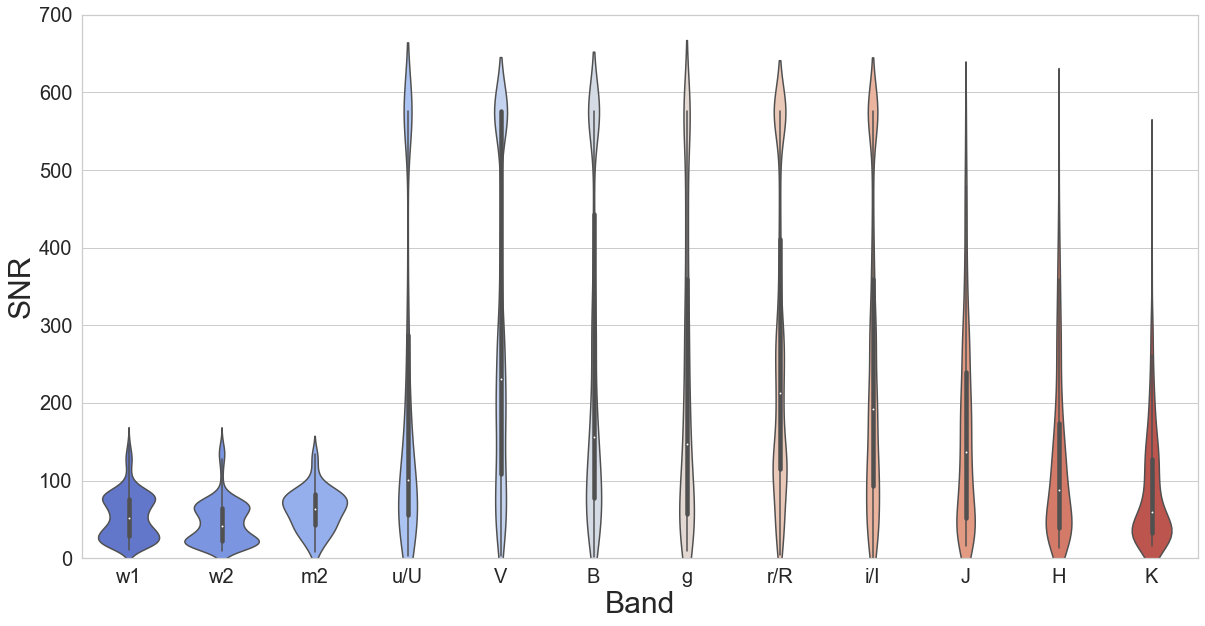

In [57]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
palette = sns.color_palette("coolwarm", n_colors =12)
ax = sns.violinplot(x="Band", y="SNR", data=snr, palette = palette)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.xaxis.label.set_size(30)
ax.yaxis.label.set_size(30)
ax.set_ylim((0,700))
plt.savefig('SNR_plot_add_Ibns.pdf', bbox_inches='tight')

In [58]:
for b in snr.Band.unique():
    
    print(b, np.median(snr.SNR[snr.Band == b].values))

w1 51.860023498535156
w2 42.017974853515625
m2 63.960693359375
u/U 100.99057388305664
V 230.25848388671875
B 155.580078125
g 147.60159301757812
r/R 213.20230102539062
i/I 191.88209533691406
J 137.05862426757812
H 87.89004898071289
K 59.35128211975098
